In [1]:
import pandas as pd
df = pd.read_csv('dummy_data_hss.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [2]:
df.shape

(4572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [12]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [6]:
df['TV'] = df['TV'].fillna(df['TV'].mean())

In [9]:
df['Radio'] = df['Radio'].fillna(df['Radio'].mean())

In [10]:
df['Social Media'] = df['Social Media'].fillna(df['Social Media'].mean())

In [11]:
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())

In [13]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [14]:
df['Influencer'] = lab.fit_transform(df['Influencer'])

In [15]:
df['Influencer'].value_counts()

1    1158
2    1153
3    1139
0    1122
Name: Influencer, dtype: int64

In [23]:
x = df.drop(columns=['Sales'])
y = df['Sales']

In [24]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=12,test_size=0.30)

In [25]:
from sklearn.linear_model import Lasso
las = Lasso()

In [26]:
las.fit(x_train,y_train)

Lasso()

In [27]:
y_pred = las.predict(x_test)

In [28]:
y_pred

array([146.17894992, 346.23295895, 288.77880987, ..., 237.86488973,
        99.22228592, 227.75725698])

In [29]:
y_test

4445    148.060081
3467    344.715192
1630    282.471468
1883    140.528208
326     132.549615
           ...    
2694    279.061514
1635    349.063226
1214    239.170888
910     105.163312
3661    225.804995
Name: Sales, Length: 1372, dtype: float64

In [30]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test,y_pred)

0.9917874534911395

In [31]:
mean_squared_error(y_test,y_pred)

71.86982958773649

In [32]:
mean_absolute_error(y_test,y_pred)

2.950974981689811

Text(0.5, 1.0, 'radio vs sales')

<Figure size 432x288 with 0 Axes>

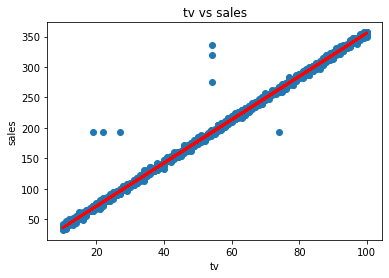

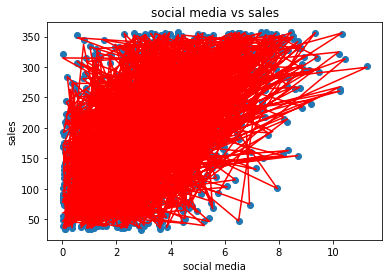

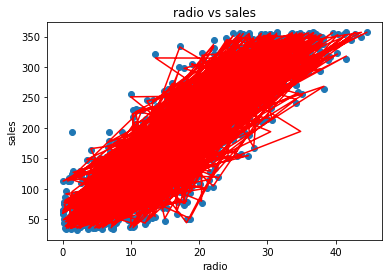

In [53]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))

plt.subplots(1,1)
plt.scatter(x_test['TV'],y_test)
plt.plot(x_test['TV'],y_pred,'r')
plt.xlabel('tv')
plt.ylabel('sales')
plt.title('tv vs sales')

plt.subplots(1,1)
plt.scatter(x_test['Social Media'],y_test)
plt.plot(x_test['Social Media'],y_pred,'r')
plt.xlabel('social media')
plt.ylabel('sales')
plt.title('social media vs sales')

plt.subplots(1,1)
plt.scatter(x_test['Radio'],y_test)
plt.plot(x_test['Radio'],y_pred,'r')
plt.xlabel('radio')
plt.ylabel('sales')
plt.title('radio vs sales')